In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("USA_Housing.csv")
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [4]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [5]:
#cehcking null values 
data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [6]:
data.dtypes

Avg. Area Income                float64
Avg. Area House Age             float64
Avg. Area Number of Rooms       float64
Avg. Area Number of Bedrooms    float64
Area Population                 float64
Price                           float64
Address                          object
dtype: object

In [7]:
# we can remove address column beacuse it has no significant importance in our problem
data.drop(["Address"],axis=1,inplace=True)

In [8]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

<Axes: >

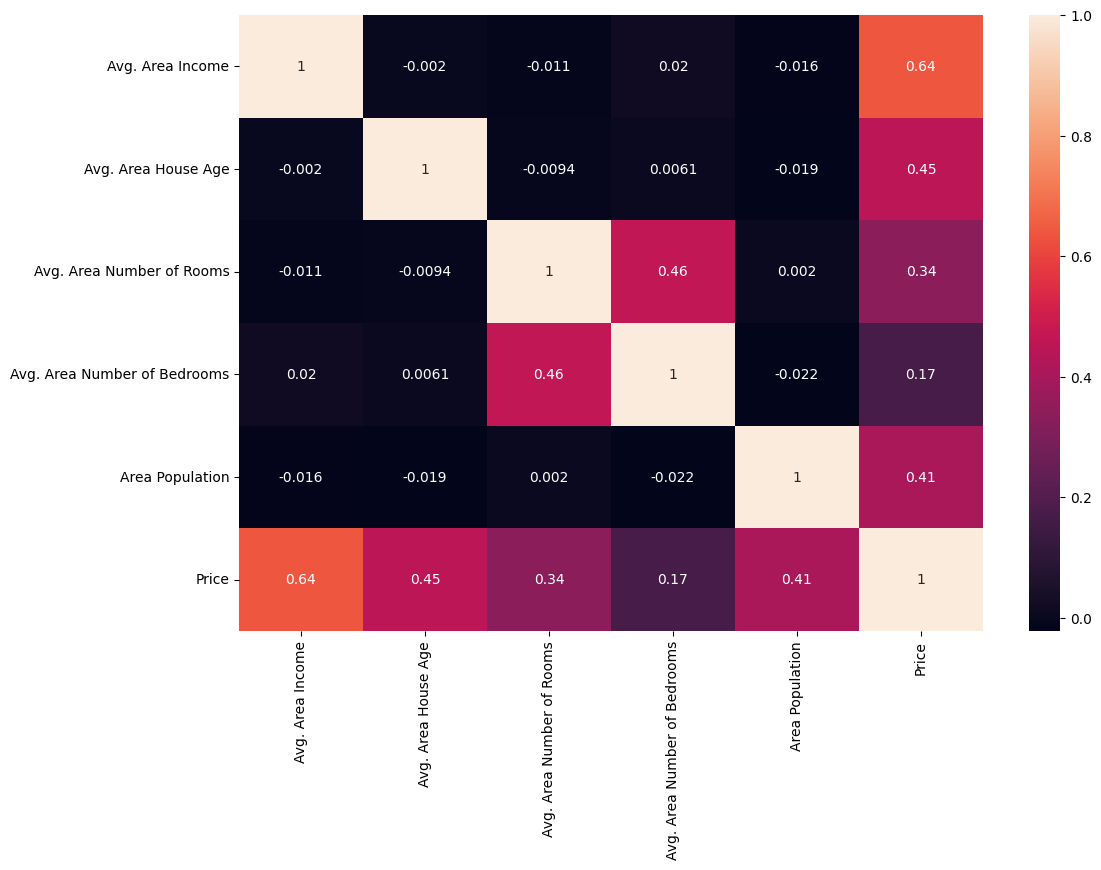

In [9]:
cor=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=cor,annot=True)

In [10]:
X=data.drop("Price",axis=1)
y=data["Price"]

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [12]:
# standardize the the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [14]:
lr.fit(X_train,y_train)

LinearRegression()

In [15]:
y_pred=lr.predict(X_test)

In [16]:
from sklearn.metrics import r2_score
r2_test=r2_score(y_test,y_pred)
print("R2 Score: ",r2_test)

R2 Score:  0.9179971706834331


In [17]:
# score on training data
y_pred_train=lr.predict(X_train)
r2_train=r2_score(y_train,y_pred_train)
print("R2 Score: ",r2_train)

R2 Score:  0.9179787435623722


In [18]:
# find the significance of the realtionship between independent and dependent variable
import statsmodels.api as sm
X_train=sm.add_constant(X_train) # adding constant
lm=sm.OLS(y_train,X_train).fit()

In [19]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8940.
Date:                Fri, 08 Dec 2023   Prob (F-statistic):               0.00
Time:                        16:36:39   Log-Likelihood:                -51778.
No. Observations:                4000   AIC:                         1.036e+05
Df Residuals:                    3994   BIC:                         1.036e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.23e+06   1602.477    767.298      0.0

In [20]:
data.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price'],
      dtype='object')

In [21]:
#after removing 4th attribute
X=data.drop(["Price","Avg. Area Number of Bedrooms"],axis=1)
y=data["Price"]

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [23]:
# standardize the the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
final_model=LinearRegression()

In [25]:
final_model.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred=final_model.predict(X_test)

In [27]:
print("R2 Score: ",r2_score(y_test,y_pred))

R2 Score:  0.9181214278738103


In [28]:
# Decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [29]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [30]:
y_pred=dtr.predict(X_test)

In [31]:
print("R2 Score: ",r2_score(y_test,y_pred))

R2 Score:  0.7410130518957717


In [35]:
# hyper parameter tuning
from sklearn.model_selection import RandomizedSearchCV
dtr_t=DecisionTreeRegressor()
paramter={"criterion":['squared_error', 'absolute_error'],
         "max_depth":[2,4,6,8],
         "min_samples_split":np.arange(2,10),
         "min_samples_leaf":np.arange(1,10)}

In [36]:
random_model=RandomizedSearchCV(dtr,paramter,cv=5,scoring="neg_mean_squared_error")

In [37]:
random_model.fit (X_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(),
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error'],
                                        'max_depth': [2, 4, 6, 8],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   scoring='neg_mean_squared_error')

In [38]:
print("Best hyperparameters: ",random_model.best_params_)

Best hyperparameters:  {'min_samples_split': 7, 'min_samples_leaf': 6, 'max_depth': 8, 'criterion': 'absolute_error'}


In [39]:
best_model=random_model.best_estimator_

In [40]:
y_pred=best_model.predict(X_test)

In [42]:
print("R2 Score: ",r2_score(y_test,y_pred))

R2 Score:  0.7655529902319341


In [44]:
# ridge regressor
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1)

In [45]:
ridge.fit(X_train,y_train)

Ridge(alpha=1)

In [46]:
y_pred=ridge.predict(X_test)

In [47]:
print("R2 Score: ",r2_score(y_test,y_pred))

R2 Score:  0.9181227238851049


In [52]:
# hyperparamter tuning
from sklearn.model_selection import GridSearchCV
ridge_reg=Ridge()

In [49]:
params={"alpha": np.logspace(-4, 4, 9)}

In [53]:
grid_rid=GridSearchCV(ridge_reg,params,cv=5, scoring='neg_mean_squared_error')

In [54]:
grid_rid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             scoring='neg_mean_squared_error')

In [55]:
print("Best hyperparamter: ",grid_rid.best_params_)

Best hyperparamter:  {'alpha': 1.0}
